# House Prices Prediction

## Importing the libraries

In [61]:
import os
import pandas as pd
import numpy as np
from sklearn import linear_model
import seaborn as sns
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

## Importing the dataset

In [66]:
dataset = pd.read_csv('HousePrice.csv')
dataset = dataset.drop(['Unnamed: 0'], axis=1)

In [59]:
dataset[0:5]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


The features can be summarized as follows:

> * CRIM: This is the per capita crime rate by town
> * ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
> * INDUS: This is the proportion of non-retail business acres per town.
> * CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
> * NOX: This is the nitric oxides concentration (parts per 10 million)
> * RM: This is the average number of rooms per dwelling
> * AGE: This is the proportion of owner-occupied units built prior to 1940
> * DIS: This is the weighted distances to five Boston employment centers
> * RAD: This is the index of accessibility to radial highways
> * TAX: This is the full-value property-tax rate per \$10,000
> * PTRATIO: This is the pupil-teacher ratio by town
> * B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
> * LSTAT: This is the percentage lower status of the population
> * MEDV: This is the median value of owner-occupied homes in \$1000s


## Analysing the dataset

#### First, we would like to know more about our dependent variable  MEDV

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <a list of 10 Patch objects>)

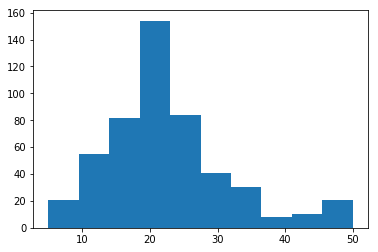

In [19]:
plt.hist(y)

The above histogram shows a very nice normal distribution, which means that the number of records for the mean value is maximum.

In [22]:
dataset['MEDV'].std()

9.19710408737982

#### Let's take a categorical variables first.

##### Let's first take the CHAS variable

In [31]:
print("Negative {}  Positive {}".
      format(dataset[dataset['CHAS'] == 0]['CHAS'].count(),dataset[dataset['CHAS'] == 1]['CHAS'].count()))

Negative 471  Positive 35


Well, this is as expected because there would be few such houses for which the tract bound the Charles river. Let's now see the impact of this feature on the Price.

[]

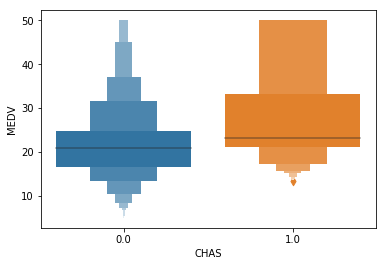

In [28]:
p = sns.boxenplot(x=dataset['CHAS'], y=dataset['MEDV'], )

It is clearly shown by the diagram that prices are higher for houses which have CHAS=1

##### Then, we have the RAD variable which is the index of accessibility to radial highways

In [34]:
dataset['RAD'].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

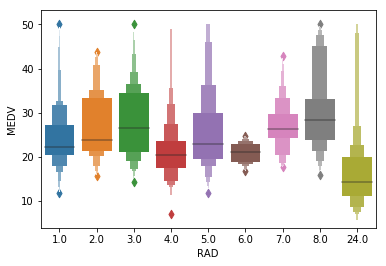

In [35]:
p = sns.boxenplot(x=dataset['RAD'], y=dataset['MEDV'])

Except for some RAD values as 8 and 24, almost all of them account the same in our dependent variable. So, we may later think of removing this value and check if the accuracy imporoves.

#### All the other features are numeric. For them we will use pairplot from seaborn library.

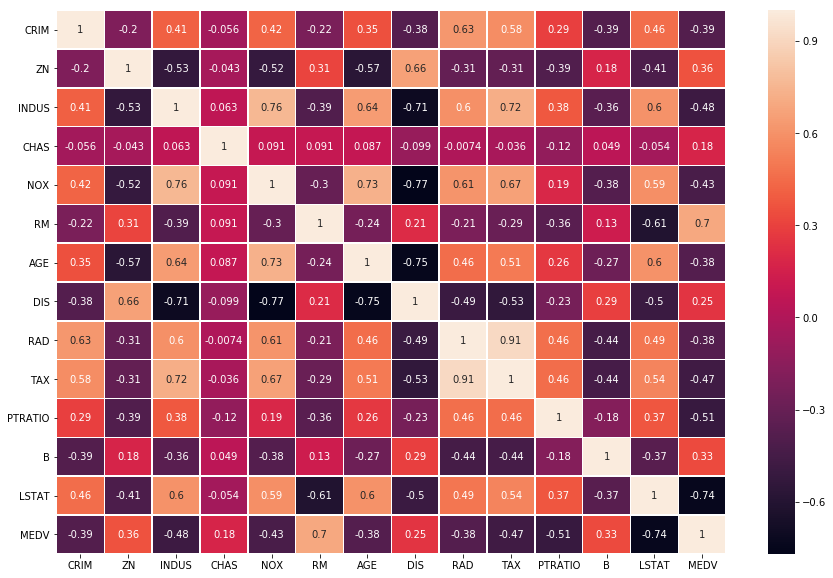

In [44]:
corr = dataset.corr()
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr, annot=True, linewidths=0.5)

Insights from the heatmap :
> * As for MEDV, it doesn't have much correlation with any of the variables except RM.
> * Also, we can notice high correlation between RAD and TAX variables, which is quite obvious considering the fact that >taxes would be directly proportional to the accesibility to radial highways
> * The negative correlations of MEDV with CRIM, NOX, LSTAT and others are very obvious.

## Data Pre-Processing

In [78]:
x = dataset[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','TAX','PTRATIO','B','LSTAT']]
y = dataset[['MEDV']]

#### Encoding the dataset

In [79]:
encoder = LabelEncoder()
chas = encoder.fit_transform(x['CHAS'])
x['CHAS'] = chas

C:\Users\Nuages\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [80]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33


### Scaling the features

In [82]:
sc = StandardScaler()
x = pd.DataFrame(sc.fit_transform(x), columns=x.columns)

C:\Users\Nuages\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Nuages\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [83]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-1.106115,0.113032,0.441052,-1.026501


## Dividing dataset into training and test sets

In [84]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.197, random_state = 42)

In [85]:
len(x_train), len(x_test)

(406, 100)

## Fitting a model

In [88]:
reg = linear_model.LinearRegression(normalize=True)
reg.fit(x_train, y_train)
results = clf.predict(x_test)

In [89]:
Score = r2_score(y_test, results, sample_weight=None, multioutput='uniform_average')
print(Score)

0.6416196348819314
